In [246]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve

import warnings
warnings.filterwarnings("ignore");

RAND = 10
from datetime import datetime

In [247]:
date = pd.read_excel('test_task_dataset_created_20210611.xlsx')  

In [248]:
date

target_flag  crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0            good                                               40.0          
1            good                                               72.0          
2            good                                               77.0          
3            good                                                6.0          
4            good                                                8.0          
...           ...                                                ...          
35306        good                                               36.0          
35307         bad                                               10.0          
35308        good                                               19.0          
35309        good                                               41.0          
35310         bad                                               37.0          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                          4.0   
1                                          2.0   
2                                          4.0   
3                                          1.0   
4                                          5.0   
...                                        ...   
35306                                      2.0   
35307                                      1.0   
35308                                      4.0   
35309                                      4.0   
35310                                      2.0   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
3                                                    0.0             
4                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                               

In [249]:
#Общая информация
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Columns: 285 entries, target_flag to credres__credit_req_cnt__org_bnk__more_than_360_days
dtypes: datetime64[ns](2), float64(278), object(5)
memory usage: 76.8+ MB


In [250]:
#Даты в формате object и datetime64
date[['target_flag', 'crdeal_deallife__first_loan_open_date', 'crdeal_deallife__last_loan_open_date',
     'crdeal_deallife__first_loan_open_date__donor_mfo', 'crdeal_deallife__last_loan_open_date__donor_mfo',
     'crdeal_deallife__first_loan_open_date__donor_bnk', 'crdeal_deallife__last_loan_open_date__donor_bnk']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   target_flag                                       35311 non-null  object        
 1   crdeal_deallife__first_loan_open_date             35217 non-null  object        
 2   crdeal_deallife__last_loan_open_date              35217 non-null  object        
 3   crdeal_deallife__first_loan_open_date__donor_mfo  33624 non-null  datetime64[ns]
 4   crdeal_deallife__last_loan_open_date__donor_mfo   33624 non-null  datetime64[ns]
 5   crdeal_deallife__first_loan_open_date__donor_bnk  33368 non-null  object        
 6   crdeal_deallife__last_loan_open_date__donor_bnk   33368 non-null  object        
dtypes: datetime64[ns](2), object(5)
memory usage: 1.9+ MB


In [251]:
#Данные даты в формате object
date[['target_flag', 'crdeal_deallife__first_loan_open_date', 'crdeal_deallife__last_loan_open_date',
     'crdeal_deallife__first_loan_open_date__donor_mfo', 'crdeal_deallife__last_loan_open_date__donor_mfo',
     'crdeal_deallife__first_loan_open_date__donor_bnk', 'crdeal_deallife__last_loan_open_date__donor_bnk']]

target_flag crdeal_deallife__first_loan_open_date  \
0            good                   2006-08-29 00:00:00   
1            good                   2012-03-02 00:00:00   
2            good                   2008-11-11 00:00:00   
3            good                   2006-12-19 00:00:00   
4            good                   2008-05-20 00:00:00   
...           ...                                   ...   
35306        good                   2019-01-09 00:00:00   
35307         bad                   2017-11-02 00:00:00   
35308        good                   2012-02-08 00:00:00   
35309        good                   2007-12-03 00:00:00   
35310         bad                   2009-04-29 00:00:00   

      crdeal_deallife__last_loan_open_date  \
0                      2006-08-29 00:00:00   
1                      2012-03-02 00:00:00   
2                      2008-11-11 00:00:00   
3                      2006-12-19 00:00:00   
4                      2008-05-20 00:00:00   
...                                    ...   
35306                  2019-01-09 00:00:00   
35307                  2017-11-02 00:00:00   
35308                  2012-02-08 00:00:00   
35309                  2007-12-03 00:00:00   
35310                  2009-04-29 00:00:00   

      crdeal_deallife__first_loan_open_date__donor_mfo  \
0                                           2019-02-20   
1                                           2019-01-10   
2                                           2017-09-05   
3                                           2020-05-26   
4                                           2019-11-28   
...                                                ...   
35306                                       2019-08-09   
35307                                       2019-11-26   
35308                                       2019-07-24   
35309                                       2018-12-12   
35310                                       2016-06-18   

      crdeal_deallife__last_loan_open_date__donor_mfo  \
0                                          2019-02-20   
1                                          2019-01-10   
2                                          2017-09-05   
3                                          2020-05-26   
4                                          2019-11-28   
...                                               ...   
35306                                      2019-08-09   
35307                                      2019-11-26   
35308                                      2019-07-24   
35309                                      2018-12-12   
35310                                      2016-06-18   

      crdeal_deallife__first_loan_open_date__donor_bnk  \
0                                  2006-08-29 00:00:00   
1                                  2012-03-02 00:00:00   
2                                  2008-11-11 00:00:00   
3                                  2006-12-19 00:00:00   
4                                  2008-05-20 00:00:00   
...                                                ...   
35306                              2019-01-09 00:00:00   
35307                              2017-11-02 00:00:00   
35308                              2012-02-08 00:00:00   
35309                              2007-12-03 00:00:00   
35310                              2009-04-29 00:00:00   

      crdeal_deallife__last_loan_open_date__donor_bnk  
0                                 2006-08-29 00:00:00  
1                                 2012-03-02 00:00:00  
2                                 2008-11-11 00:00:00  
3                                 2006-12-19 00:00:00  
4                                 2008-05-20 00:00:00  
...                                               ...  
35306                             2019-01-09 00:00:00  
35307                             2017-11-02 00:00:00  
35308                             2012-02-08 00:00:00  
35309                             2007-12-03 00:00:00  
35310                             2009-04-29 00:0

In [252]:
date[['crdeal_deallife__first_loan_open_date', 'crdeal_deallife__last_loan_open_date',
     'crdeal_deallife__first_loan_open_date__donor_bnk', 'crdeal_deallife__last_loan_open_date__donor_bnk']] = date[['crdeal_deallife__first_loan_open_date', 'crdeal_deallife__last_loan_open_date',
     'crdeal_deallife__first_loan_open_date__donor_bnk', 'crdeal_deallife__last_loan_open_date__donor_bnk']].astype(str).apply(pd.to_datetime)

In [253]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Columns: 285 entries, target_flag to credres__credit_req_cnt__org_bnk__more_than_360_days
dtypes: datetime64[ns](6), float64(278), object(1)
memory usage: 76.8+ MB


In [254]:
date.describe()

crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
count                                       35217.000000          
mean                                           23.910043          
std                                            27.970371          
min                                             1.000000          
25%                                             7.000000          
50%                                            16.000000          
75%                                            30.000000          
max                                           919.000000          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
count                                       35217.000000              
mean                                            0.009796              
std                                             0.127181              
min                                             0.000000              
25%                                             0.000000              
50%                                             0.000000              
75%                                             0.000000              
max                                            14.000000              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
count                             35217.000000   
mean                                  3.628645   
std                                   4.029838   
min                                   0.000000   
25%                                   1.000000   
50%                                   3.000000   
75%                                   5.000000   
max                                 272.000000   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
count                                       35217.000000             
mean                                            0.002357             
std                                             0.059052             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.000000             
max                                             6.000000             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
count                                       35217.000000              
mean                                            0.032456              
std                                             0.223550              
min                                             0.000000              
25%                                             0.000000              
50%                                             0.000000              
75%                                             0.000000              
max                                             9.000000              

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_45_days  \
count                                       35217.000000              
mean                                            0.060993              
std                                             0.306996              
min                                             0.000000              
25%                                             0.000000              
50%                                             0.000000              
75%                                             0.000000              
max                                            12.000000              

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_60_days  \
count                                       35217.000000              
mean                                            0.094613              
std                                             0.391830              
min                                             0.000000              
25%                                           

In [255]:
date.nunique()

target_flag                                                       3
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah        272
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah      5
crdeal_deallife__loans_cnt__dldonor_bnk                          53
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days       4
                                                               ... 
credres__credit_req_cnt__org_bnk__last_30_days                   21
credres__credit_req_cnt__org_bnk__last_60_days                   30
credres__credit_req_cnt__org_bnk__more_than_90_days              94
credres__credit_req_cnt__org_bnk__last_360_days                  75
credres__credit_req_cnt__org_bnk__more_than_360_days             63
Length: 285, dtype: int64

In [256]:
date.credres__credit_req_cnt__org_bnk__more_than_360_days.unique()

array([ 4., 11.,  9.,  0., 12.,  7.,  1.,  6.,  3.,  2.,  5., 13.,  8.,
       30., 10., 15., 26., 14., 32., 28., 68., 17., 16., 27., 21., 45.,
       22., nan, 19., 31., 25., 23., 34., 18., 29., 24., 38., 20., 35.,
       75., 73., 41., 33., 46., 42., 39., 51., 79., 50., 36., 44., 40.,
       60., 37., 52., 66., 49., 48., 43., 71., 78., 56., 47., 57.])

In [257]:
date.dtypes.value_counts()

float64           278
datetime64[ns]      6
object              1
dtype: int64

In [258]:
date.isnull().sum(axis=0)

target_flag                                                       0
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah         94
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah     94
crdeal_deallife__loans_cnt__dldonor_bnk                          94
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days      94
                                                               ... 
credres__credit_req_cnt__org_bnk__last_30_days                  137
credres__credit_req_cnt__org_bnk__last_60_days                  137
credres__credit_req_cnt__org_bnk__more_than_90_days             137
credres__credit_req_cnt__org_bnk__last_360_days                 137
credres__credit_req_cnt__org_bnk__more_than_360_days            137
Length: 285, dtype: int64

In [259]:
date.sort_values(by=['crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah'])

target_flag  \
22512             bad   
32358            good   
19752  not determined   
19736            good   
12676  not determined   
...               ...   
34252            good   
35064            good   
35084  not determined   
35103            good   
35259            good   

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
22512                                                1.0          
32358                                                1.0          
19752                                                1.0          
19736                                                1.0          
12676                                                1.0          
...                                                  ...          
34252                                                NaN          
35064                                                NaN          
35084                                                NaN          
35103                                                NaN          
35259                                                NaN          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
22512                                                0.0              
32358                                                0.0              
19752                                                0.0              
19736                                                0.0              
12676                                                0.0              
...                                                  ...              
34252                                                NaN              
35064                                                NaN              
35084                                                NaN              
35103                                                NaN              
35259                                                NaN              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
22512                                      1.0   
32358                                      1.0   
19752                                      1.0   
19736                                      1.0   
12676                                      1.0   
...                                        ...   
34252                                      NaN   
35064                                      NaN   
35084                                      NaN   
35103                                      NaN   
35259                                      NaN   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
22512                                                0.0             
32358                                                0.0             
19752                                                0.0             
19736                                                0.0             
12676                                                0.0             
...                                                  ...             
34252                                                NaN             
35064                                                NaN             
35084                                                NaN             
35103                                                NaN             
35259                                                NaN             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
22512                                                0.0              
32358                                                0.0              
19752                                                0.0              
19736                                                0.0              
12676                                                0.0              
...                                                  ...              
34252                                                NaN              
35064                                    

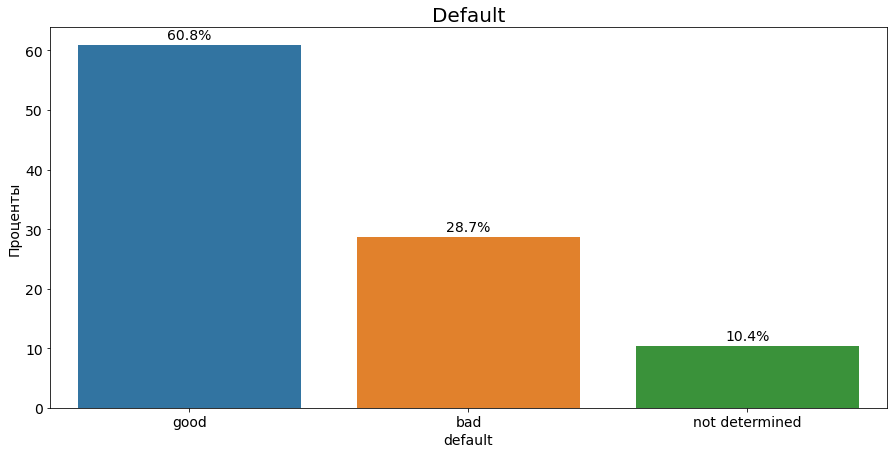

In [260]:
# нормирование на размер датасета
norm_target = (date
               .target_flag
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [261]:
date_not_nan = date.dropna()

In [262]:
date_not_nan

target_flag  \
0                good   
1                good   
2                good   
5                good   
7      not determined   
...               ...   
35306            good   
35307             bad   
35308            good   
35309            good   
35310             bad   

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0                                                   40.0          
1                                                   72.0          
2                                                   77.0          
5                                                   58.0          
7                                                    3.0          
...                                                  ...          
35306                                               36.0          
35307                                               10.0          
35308                                               19.0          
35309                                               41.0          
35310                                               37.0          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                          4.0   
1                                          2.0   
2                                          4.0   
5                                         17.0   
7                                          2.0   
...                                        ...   
35306                                      2.0   
35307                                      1.0   
35308                                      4.0   
35309                                      4.0   
35310                                      2.0   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
5                                                    0.0             
7                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                    

In [263]:
date_not_nan.isnull().sum(axis=0)

target_flag                                                     0
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah        0
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah    0
crdeal_deallife__loans_cnt__dldonor_bnk                         0
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days     0
                                                               ..
credres__credit_req_cnt__org_bnk__last_30_days                  0
credres__credit_req_cnt__org_bnk__last_60_days                  0
credres__credit_req_cnt__org_bnk__more_than_90_days             0
credres__credit_req_cnt__org_bnk__last_360_days                 0
credres__credit_req_cnt__org_bnk__more_than_360_days            0
Length: 285, dtype: int64

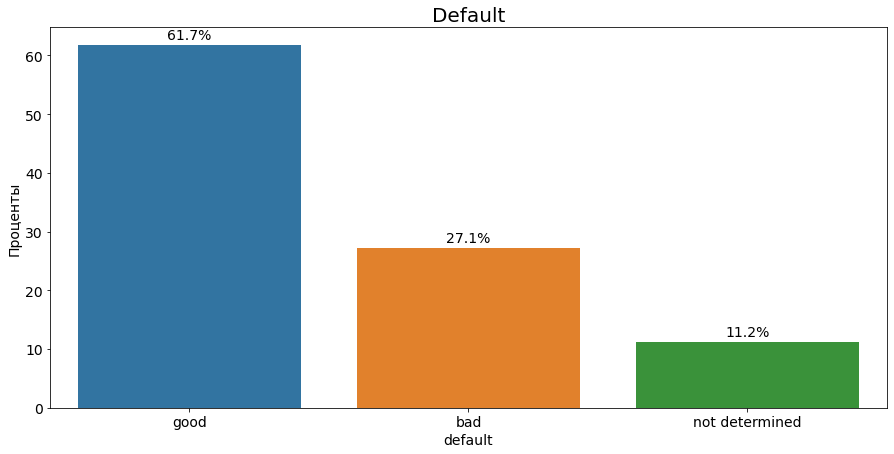

In [264]:
# нормирование на размер датасета
norm_target = (date_not_nan
               .target_flag
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [265]:
# Пропорции при удалении данных с NaN не изменяют пропорцию в данных. Потому можно их удалить с малым влиянием на результат

In [266]:
cols = date_not_nan.columns

In [267]:
cols

Index(['target_flag',
       'crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah',
       'crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah',
       'crdeal_deallife__loans_cnt__dldonor_bnk',
       'crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days',
       'crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days',
       'crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_45_days',
       'crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_60_days',
       'crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_90_days',
       'crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_120_days',
       ...
       'credres__credit_req_cnt__org_bnk__last_3_5_days',
       'credres__credit_req_cnt__org_bnk__last_7_days',
       'credres__credit_req_cnt__org_bnk__last_10_days',
       'credres__credit_req_cnt__org_bnk__last_13_days',
       'credres__credit_req_cnt__org_bnk__last_20_days',
       'credres__credit_req_cnt__org_bnk__last_30_days',
       'cre

In [268]:
name_cols = []
for i in range(len(cols)):
    name_cols.append(cols[i])

In [269]:
del_col = ['target_flag', 'crdeal_deallife__first_loan_open_date', 'crdeal_deallife__last_loan_open_date',
     'crdeal_deallife__first_loan_open_date__donor_mfo', 'crdeal_deallife__last_loan_open_date__donor_mfo',
     'crdeal_deallife__first_loan_open_date__donor_bnk', 'crdeal_deallife__last_loan_open_date__donor_bnk']

In [270]:
del_col

['target_flag',
 'crdeal_deallife__first_loan_open_date',
 'crdeal_deallife__last_loan_open_date',
 'crdeal_deallife__first_loan_open_date__donor_mfo',
 'crdeal_deallife__last_loan_open_date__donor_mfo',
 'crdeal_deallife__first_loan_open_date__donor_bnk',
 'crdeal_deallife__last_loan_open_date__donor_bnk']

In [271]:
for i in range(len(del_col)):
    name_cols.remove(del_col[i])

In [272]:
len(name_cols)

278

In [273]:
date_not_nan

target_flag  \
0                good   
1                good   
2                good   
5                good   
7      not determined   
...               ...   
35306            good   
35307             bad   
35308            good   
35309            good   
35310             bad   

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0                                                   40.0          
1                                                   72.0          
2                                                   77.0          
5                                                   58.0          
7                                                    3.0          
...                                                  ...          
35306                                               36.0          
35307                                               10.0          
35308                                               19.0          
35309                                               41.0          
35310                                               37.0          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                          4.0   
1                                          2.0   
2                                          4.0   
5                                         17.0   
7                                          2.0   
...                                        ...   
35306                                      2.0   
35307                                      1.0   
35308                                      4.0   
35309                                      4.0   
35310                                      2.0   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
5                                                    0.0             
7                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                    

In [87]:
#Feature engeniring

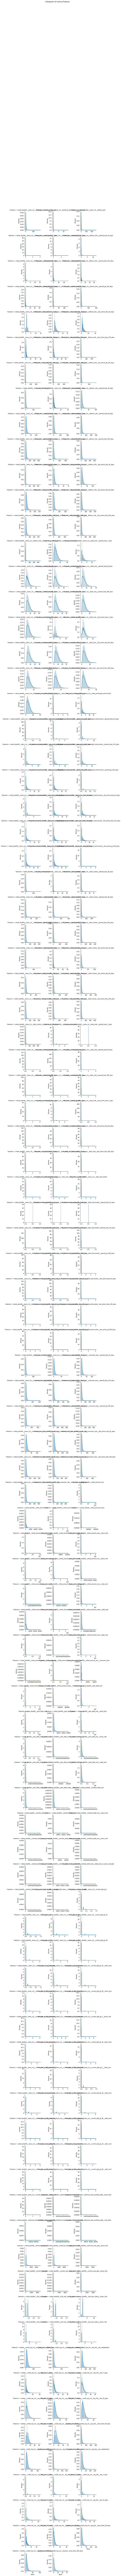

In [88]:
numeric_features = date_not_nan[name_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features")
plt.savefig('1.png');

In [274]:
#Нормализуем значения фичей
for i in name_cols:
    date_not_nan[i] = np.log(date_not_nan[i]+1)

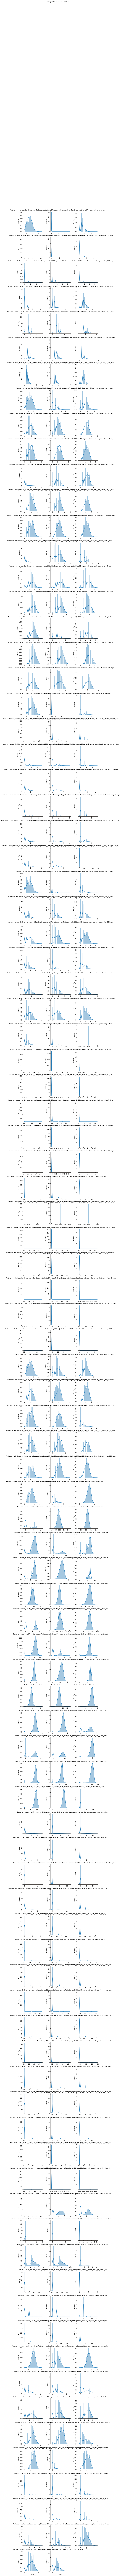

In [30]:
numeric_features = date_not_nan[name_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features")
plt.savefig('2.png');

In [275]:
date_not_nan

target_flag  \
0                good   
1                good   
2                good   
5                good   
7      not determined   
...               ...   
35306            good   
35307             bad   
35308            good   
35309            good   
35310             bad   

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0                                               3.713572          
1                                               4.290459          
2                                               4.356709          
5                                               4.077537          
7                                               1.386294          
...                                                  ...          
35306                                           3.610918          
35307                                           2.397895          
35308                                           2.995732          
35309                                           3.737670          
35310                                           3.637586          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                     1.609438   
1                                     1.098612   
2                                     1.609438   
5                                     2.890372   
7                                     1.098612   
...                                        ...   
35306                                 1.098612   
35307                                 0.693147   
35308                                 1.609438   
35309                                 1.609438   
35310                                 1.098612   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
5                                                    0.0             
7                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                    

In [276]:
del_col = ['target_flag', 'crdeal_deallife__first_loan_open_date', 'crdeal_deallife__last_loan_open_date',
     'crdeal_deallife__first_loan_open_date__donor_mfo', 'crdeal_deallife__last_loan_open_date__donor_mfo',
     'crdeal_deallife__first_loan_open_date__donor_bnk', 'crdeal_deallife__last_loan_open_date__donor_bnk']

In [277]:
del_col

['target_flag',
 'crdeal_deallife__first_loan_open_date',
 'crdeal_deallife__last_loan_open_date',
 'crdeal_deallife__first_loan_open_date__donor_mfo',
 'crdeal_deallife__last_loan_open_date__donor_mfo',
 'crdeal_deallife__first_loan_open_date__donor_bnk',
 'crdeal_deallife__last_loan_open_date__donor_bnk']

In [278]:
# Добавим новые признаки связаные с временем

In [279]:
# Добавим новые признаки связаные с временем
date_not_nan['crdeal_deallife__first_loan_open_date_year'] = date_not_nan['crdeal_deallife__first_loan_open_date'].dt.year.astype(object)
date_not_nan['crdeal_deallife__first_loan_open_date_month'] = date_not_nan['crdeal_deallife__first_loan_open_date'].dt.month.astype(object)
date_not_nan['crdeal_deallife__first_loan_open_date_day'] = date_not_nan['crdeal_deallife__first_loan_open_date'].dt.day.astype(object)

date_not_nan.drop(['crdeal_deallife__first_loan_open_date'],  axis=1, inplace=True)

In [280]:
date_not_nan['crdeal_deallife__last_loan_open_date_year'] = date_not_nan['crdeal_deallife__last_loan_open_date'].dt.year.astype(object)
date_not_nan['crdeal_deallife__last_loan_open_date_month'] = date_not_nan['crdeal_deallife__last_loan_open_date'].dt.month.astype(object)
date_not_nan['crdeal_deallife__last_loan_open_date_day'] = date_not_nan['crdeal_deallife__last_loan_open_date'].dt.day.astype(object)

date_not_nan.drop(['crdeal_deallife__last_loan_open_date'],  axis=1, inplace=True)

In [281]:
date_not_nan['crdeal_deallife__first_loan_open_date__donor_mfo_year'] = date_not_nan['crdeal_deallife__first_loan_open_date__donor_mfo'].dt.year.astype(object)
date_not_nan['crdeal_deallife__first_loan_open_date__donor_mfo_month'] = date_not_nan['crdeal_deallife__first_loan_open_date__donor_mfo'].dt.month.astype(object)
date_not_nan['crdeal_deallife__first_loan_open_date__donor_mfo_day'] = date_not_nan['crdeal_deallife__first_loan_open_date__donor_mfo'].dt.day.astype(object)

date_not_nan.drop(['crdeal_deallife__first_loan_open_date__donor_mfo'],  axis=1, inplace=True)

In [282]:
date_not_nan['crdeal_deallife__last_loan_open_date__donor_mfo_year'] = date_not_nan['crdeal_deallife__last_loan_open_date__donor_mfo'].dt.year.astype(object)
date_not_nan['crdeal_deallife__last_loan_open_date__donor_mfo_month'] = date_not_nan['crdeal_deallife__last_loan_open_date__donor_mfo'].dt.month.astype(object)
date_not_nan['crdeal_deallife__last_loan_open_date__donor_mfo_day'] = date_not_nan['crdeal_deallife__last_loan_open_date__donor_mfo'].dt.day.astype(object)

date_not_nan.drop(['crdeal_deallife__last_loan_open_date__donor_mfo'],  axis=1, inplace=True)

In [283]:
date_not_nan['crdeal_deallife__first_loan_open_date__donor_bnk_year'] = date_not_nan['crdeal_deallife__first_loan_open_date__donor_bnk'].dt.year.astype(object)
date_not_nan['crdeal_deallife__first_loan_open_date__donor_bnk_month'] = date_not_nan['crdeal_deallife__first_loan_open_date__donor_bnk'].dt.month.astype(object)
date_not_nan['crdeal_deallife__first_loan_open_date__donor_bnk_day'] = date_not_nan['crdeal_deallife__first_loan_open_date__donor_bnk'].dt.day.astype(object)

date_not_nan.drop(['crdeal_deallife__first_loan_open_date__donor_bnk'],  axis=1, inplace=True)

In [284]:
date_not_nan['crdeal_deallife__last_loan_open_date__donor_bnk_year'] = date_not_nan['crdeal_deallife__last_loan_open_date__donor_bnk'].dt.year.astype(object)
date_not_nan['crdeal_deallife__last_loan_open_date__donor_bnk_month'] = date_not_nan['crdeal_deallife__last_loan_open_date__donor_bnk'].dt.month.astype(object)
date_not_nan['crdeal_deallife__last_loan_open_date__donor_bnk_day'] = date_not_nan['crdeal_deallife__last_loan_open_date__donor_bnk'].dt.day.astype(object)

date_not_nan.drop(['crdeal_deallife__last_loan_open_date__donor_bnk'],  axis=1, inplace=True)

In [285]:
date_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26282 entries, 0 to 35310
Columns: 297 entries, target_flag to crdeal_deallife__last_loan_open_date__donor_bnk_day
dtypes: float64(278), object(19)
memory usage: 59.8+ MB


In [286]:
object_cols = list(date_not_nan.dtypes[date_not_nan.dtypes == object].index)[1:]

In [287]:
object_cols

['crdeal_deallife__first_loan_open_date_year',
 'crdeal_deallife__first_loan_open_date_month',
 'crdeal_deallife__first_loan_open_date_day',
 'crdeal_deallife__last_loan_open_date_year',
 'crdeal_deallife__last_loan_open_date_month',
 'crdeal_deallife__last_loan_open_date_day',
 'crdeal_deallife__first_loan_open_date__donor_mfo_year',
 'crdeal_deallife__first_loan_open_date__donor_mfo_month',
 'crdeal_deallife__first_loan_open_date__donor_mfo_day',
 'crdeal_deallife__last_loan_open_date__donor_mfo_year',
 'crdeal_deallife__last_loan_open_date__donor_mfo_month',
 'crdeal_deallife__last_loan_open_date__donor_mfo_day',
 'crdeal_deallife__first_loan_open_date__donor_bnk_year',
 'crdeal_deallife__first_loan_open_date__donor_bnk_month',
 'crdeal_deallife__first_loan_open_date__donor_bnk_day',
 'crdeal_deallife__last_loan_open_date__donor_bnk_year',
 'crdeal_deallife__last_loan_open_date__donor_bnk_month',
 'crdeal_deallife__last_loan_open_date__donor_bnk_day']

# Моделирование

In [288]:
date_not_nan_label = pd.get_dummies(date_not_nan, columns=object_cols,
                          drop_first=True)

In [289]:
date_not_nan_label

target_flag  \
0                good   
1                good   
2                good   
5                good   
7      not determined   
...               ...   
35306            good   
35307             bad   
35308            good   
35309            good   
35310             bad   

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0                                               3.713572          
1                                               4.290459          
2                                               4.356709          
5                                               4.077537          
7                                               1.386294          
...                                                  ...          
35306                                           3.610918          
35307                                           2.397895          
35308                                           2.995732          
35309                                           3.737670          
35310                                           3.637586          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                     1.609438   
1                                     1.098612   
2                                     1.609438   
5                                     2.890372   
7                                     1.098612   
...                                        ...   
35306                                 1.098612   
35307                                 0.693147   
35308                                 1.609438   
35309                                 1.609438   
35310                                 1.098612   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
5                                                    0.0             
7                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                    

## Модель с тремя целевыми переменными LogisticRegression

In [290]:
X = date_not_nan_label.drop('target_flag', axis=1)
y = date_not_nan_label['target_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

In [291]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)

In [292]:
y_pred

array(['good', 'bad', 'not determined', ..., 'good', 'bad', 'good'],
      dtype=object)

In [293]:
y_score

array([[0.25865284, 0.50534012, 0.23600704],
       [0.4178135 , 0.33807052, 0.24411598],
       [0.22373327, 0.36814083, 0.40812591],
       ...,
       [0.23552495, 0.49762447, 0.26685058],
       [0.51900527, 0.28905696, 0.19193777],
       [0.36180787, 0.41315926, 0.22503286]])

In [294]:
print('roc-auc:', roc_auc_score(y_test, y_score, multi_class='ovo'))
print('precision:', precision_score(y_test, y_pred, pos_label='good',
                                           average='micro'))
print('recall:', recall_score(y_test, y_pred, pos_label='good',
                                           average='micro'))
print('f1:', f1_score(y_test, y_pred, pos_label='bad',
                                           average='micro'))

roc-auc: 0.642801179048921
precision: 0.4539643889818901
recall: 0.4539643889818901
f1: 0.4539643889818902


In [295]:
# Отказываюсь от трех переменных так как очень низкий Recall

## Модель с двумя значениями
### 0 - good
### 1 - bad

### 278 Фичей

In [296]:
# Значения целевых переменных которые нужно оставить
del_3 = ['good', 'bad']

In [297]:
date_not_nan

target_flag  \
0                good   
1                good   
2                good   
5                good   
7      not determined   
...               ...   
35306            good   
35307             bad   
35308            good   
35309            good   
35310             bad   

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0                                               3.713572          
1                                               4.290459          
2                                               4.356709          
5                                               4.077537          
7                                               1.386294          
...                                                  ...          
35306                                           3.610918          
35307                                           2.397895          
35308                                           2.995732          
35309                                           3.737670          
35310                                           3.637586          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                     1.609438   
1                                     1.098612   
2                                     1.609438   
5                                     2.890372   
7                                     1.098612   
...                                        ...   
35306                                 1.098612   
35307                                 0.693147   
35308                                 1.609438   
35309                                 1.609438   
35310                                 1.098612   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
5                                                    0.0             
7                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
7                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                    

In [298]:
date_297 = date_not_nan

In [299]:
#Удалим все не числовые фичи
date_279 = date_297.drop(columns=object_cols)

In [300]:
# Удалим данные с неопределенной целевой
date_279 = date_279.query("target_flag == @del_3")

In [301]:
#Переименуем целевые переменные
date_279.loc[(date_279.target_flag == 'good'), 'target_flag'] = 0
date_279.loc[(date_279.target_flag == 'bad'), 'target_flag'] = 1

In [302]:
X_279 = date_279.drop('target_flag', axis=1)
y_279 = date_279['target_flag'].astype('int')

X_train_279, X_test_279, y_train_279, y_test_279 = train_test_split(
    X_279, y_279, test_size=0.25, stratify=y_2, shuffle=True, random_state=RAND)

In [303]:
lr_279 = LogisticRegression(class_weight = 'balanced')
lr_279.fit(X_train_279, y_train_279)

y_pred_279 = lr_279.predict(X_test_279)
y_score_279 = lr_279.predict_proba(X_test_279)[:,1]

In [304]:
print('roc-auc:', roc_auc_score(y_test_2, y_score_2))
print('precision:', precision_score(y_test_2, y_pred_2))
print('recall:', recall_score(y_test_2, y_pred_2))
print('f1:', f1_score(y_test_2, y_pred_2))

roc-auc: 0.6631522790585676
precision: 0.41383055756698045
recall: 0.6414141414141414
f1: 0.503080985915493


### 635 Фичей 

In [305]:
del_3 = ['good', 'bad']

In [306]:
# Оставляем две целевые переменные
date_2 = date_not_nan_label.query("target_flag == @del_3")

In [307]:
date_2

target_flag  crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0            good                                           3.713572          
1            good                                           4.290459          
2            good                                           4.356709          
5            good                                           4.077537          
8            good                                           2.302585          
...           ...                                                ...          
35306        good                                           3.610918          
35307         bad                                           2.397895          
35308        good                                           2.995732          
35309        good                                           3.737670          
35310         bad                                           3.637586          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                               0.000000              
1                                               0.000000              
2                                               0.000000              
5                                               0.000000              
8                                               0.693147              
...                                                  ...              
35306                                           0.000000              
35307                                           0.000000              
35308                                           0.000000              
35309                                           0.000000              
35310                                           0.000000              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                     1.609438   
1                                     1.098612   
2                                     1.609438   
5                                     2.890372   
8                                     1.945910   
...                                        ...   
35306                                 1.098612   
35307                                 0.693147   
35308                                 1.609438   
35309                                 1.609438   
35310                                 1.098612   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
5                                                    0.0             
8                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
8                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                               

In [308]:
date_2.loc[(date_2.target_flag == 'good'), 'target_flag'] = 0

In [309]:
date_2.loc[(date_2.target_flag == 'bad'), 'target_flag'] = 1

In [310]:
date_2

target_flag  crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0               0                                           3.713572          
1               0                                           4.290459          
2               0                                           4.356709          
5               0                                           4.077537          
8               0                                           2.302585          
...           ...                                                ...          
35306           0                                           3.610918          
35307           1                                           2.397895          
35308           0                                           2.995732          
35309           0                                           3.737670          
35310           1                                           3.637586          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                               0.000000              
1                                               0.000000              
2                                               0.000000              
5                                               0.000000              
8                                               0.693147              
...                                                  ...              
35306                                           0.000000              
35307                                           0.000000              
35308                                           0.000000              
35309                                           0.000000              
35310                                           0.000000              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                     1.609438   
1                                     1.098612   
2                                     1.609438   
5                                     2.890372   
8                                     1.945910   
...                                        ...   
35306                                 1.098612   
35307                                 0.693147   
35308                                 1.609438   
35309                                 1.609438   
35310                                 1.098612   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
5                                                    0.0             
8                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
5                                                    0.0              
8                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                               

In [311]:
date_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23345 entries, 0 to 35310
Columns: 635 entries, target_flag to crdeal_deallife__last_loan_open_date__donor_bnk_day_31
dtypes: float64(278), object(1), uint8(356)
memory usage: 57.8+ MB


In [312]:
X_2 = date_2.drop('target_flag', axis=1)
y_2 = date_2['target_flag'].astype('int')

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.25, stratify=y_2, shuffle=True, random_state=RAND)

In [313]:
lr_2 = LogisticRegression(class_weight = 'balanced')
lr_2.fit(X_train_2, y_train_2)

y_pred_2 = lr_2.predict(X_test_2)
y_score_2 = lr_2.predict_proba(X_test_2)[:,1]

In [314]:
print('roc-auc:', roc_auc_score(y_test_2, y_score_2))
print('precision:', precision_score(y_test_2, y_pred_2))
print('recall:', recall_score(y_test_2, y_pred_2))
print('f1:', f1_score(y_test_2, y_pred_2))

roc-auc: 0.6631522790585676
precision: 0.41383055756698045
recall: 0.6414141414141414
f1: 0.503080985915493


In [315]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1'])

metrics['Baseline_LR'] = [roc_auc_score(y_test_2, y_score_2),
                          precision_score(y_test_2, y_pred_2),
                          recall_score(y_test_2, y_pred_2),
                          f1_score(y_test_2, y_pred_2)]

In [316]:
metrics

Baseline_LR
roc-auc       0.663152
precision     0.413831
recall        0.641414
f1            0.503081

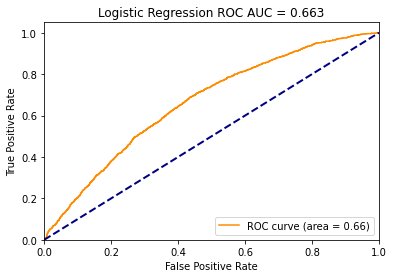

In [317]:
fpr, tpr, thresholds = roc_curve(y_test_2, y_score_2)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

# Подбор параметров

In [318]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

In [319]:
#CPU times: total: 4h 52min 47s
#Wall time: 5h 11min 9s
%%time
# производим обучение по сетке
#grid_cv.fit(X_train_2, y_train_2)

UsageError: Line magic function `%%time` not found.


In [320]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [321]:
best_params = {'C': 1.0, 
               'l1_ratio': 0.0,
               'max_iter': 100, 
               'penalty': 'l1', 
               'solver': 'saga'}

In [322]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train_2, y_train_2)

y_pred_gr = lr_gr.predict(X_test_2)
y_score_gr = lr_gr.predict_proba(X_test_2)[:,1]

In [323]:
print('roc-auc:', roc_auc_score(y_test_2, y_score_gr))
print('precision:', precision_score(y_test_2, y_pred_gr))
print('recall:', recall_score(y_test_2, y_pred_gr))
print('f1:', f1_score(y_test_2, y_pred_gr))

roc-auc: 0.6661180928340813
precision: 0.41654571843251087
recall: 0.6442199775533108
f1: 0.505949757602468


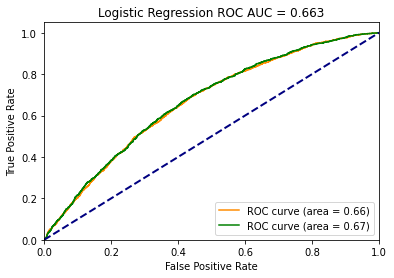

In [324]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_2, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [325]:
metrics['Grid_LR'] = [roc_auc_score(y_test_2, y_score_gr),
                      precision_score(y_test_2, y_pred_gr),
                      recall_score(y_test_2, y_pred_gr),
                      f1_score(y_test_2, y_pred_gr)]

In [326]:
metrics[:-1].style.highlight_max(axis=1, color='lightblue')

#### Увеличение точности модели не значительное по сравнению с затраченым временем на обучение.
##### Можем принимать Модель с 278 Фичами
##### roc-auc: 0.6631522790585676
##### precision: 0.41383055756698045
##### recall: 0.6414141414141414
##### f1: 0.503080985915493

# Анализ важных признаков (shap) LogisticRegression

In [327]:
lr_2.coef_

array([[-5.77888253e-02, -1.15282243e-01, -1.49211119e-01,
         6.75630117e-03, -2.39214459e-02, -4.72157517e-03,
         9.28011252e-02, -1.05459857e-01, -2.75187958e-01,
         9.11549227e-02,  5.30542610e-02, -1.91144666e-01,
         7.07924364e-02, -2.11704973e-01,  2.73526175e-02,
         1.36521762e-01,  5.95942146e-02,  9.42068298e-03,
         1.43161621e-01, -3.66607411e-03,  1.75113314e-01,
         6.10406853e-02, -6.49216016e-02, -8.59942462e-02,
        -8.10152797e-02, -1.09863287e-01,  1.00276250e-01,
         6.86391819e-02, -2.08443846e-02, -3.64630190e-02,
        -5.56545166e-02, -2.00949084e-01, -9.37256584e-02,
        -9.29665638e-02,  1.26941581e-02, -4.47837371e-02,
        -1.45566596e-01, -2.72107440e-02, -1.17435529e-01,
        -2.07498356e-03,  2.91529112e-02,  1.17764942e-02,
         1.46747972e-01,  1.48016217e-01,  1.67675748e-01,
         2.80403750e-01,  1.79453915e-01,  2.29463164e-01,
         6.67585880e-02, -2.68757124e-01,  1.29789535e-0

In [328]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X_279.columns
feature_imp['imp'] = lr_279.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)

In [329]:
feature_imp

feature       imp
262     credres__credit_req_cnt__org_mfo__last_60_days  0.320783
78            crdeal_deallife__loans_cnt__state_closed  0.289708
45   crdeal_deallife__loans_cnt__state_exst__opened...  0.269314
184         crdeal_deallife__plan_debt_mean__donor_mfo  0.258994
167   crdeal_deallife__initial_amount_mean__state_exst  0.257582
..                                                 ...       ...
182          crdeal_deallife__plan_debt_sum__donor_mfo -0.181219
49   crdeal_deallife__loans_cnt__state_exst__opened... -0.248953
8    crdeal_deallife__loans_cnt__dldonor_bnk__opene... -0.257712
252  credres__credit_req_cnt__any_org__any_reqdatetime -0.288377
152                crdeal_deallife__initial_amount_sum -0.303047

[278 rows x 2 columns]

In [330]:
date_279.groupby('target_flag')[['crdeal_deallife__loans_cnt__state_closed']].median()

crdeal_deallife__loans_cnt__state_closed
target_flag                                          
0                                            2.564949
1                                            2.302585

In [331]:
colus = X_279.columns

In [332]:
name_cols_feature = []
for i in range(len(colus)):
    name_cols_feature.append(colus[i])

In [333]:
#name_cols_feature

In [334]:
date_279[name_cols_feature + ['target_flag']].groupby('target_flag')[name_cols_feature].mean().T

target_flag                                                0         1
crdeal_deallife__loans_cnt__dlrolesub_zaemshik_...  3.089424  2.927516
crdeal_deallife__loans_cnt__dlrolesub_zaemshik_...  0.007812  0.005867
crdeal_deallife__loans_cnt__dldonor_bnk             1.464709  1.431943
crdeal_deallife__loans_cnt__dldonor_bnk__opened...  0.001478  0.001475
crdeal_deallife__loans_cnt__dldonor_bnk__opened...  0.022034  0.027338
...                                                      ...       ...
credres__credit_req_cnt__org_bnk__last_30_days      0.586409  0.669630
credres__credit_req_cnt__org_bnk__last_60_days      0.892323  1.001476
credres__credit_req_cnt__org_bnk__more_than_90_...  1.945207  1.849773
credres__credit_req_cnt__org_bnk__last_360_days     1.847506  1.875960
credres__credit_req_cnt__org_bnk__more_than_360...  1.278508  1.172201

[278 rows x 2 columns]

# Предсказание всех данных

In [335]:
date

target_flag  crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0            good                                               40.0          
1            good                                               72.0          
2            good                                               77.0          
3            good                                                6.0          
4            good                                                8.0          
...           ...                                                ...          
35306        good                                               36.0          
35307         bad                                               10.0          
35308        good                                               19.0          
35309        good                                               41.0          
35310         bad                                               37.0          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                          4.0   
1                                          2.0   
2                                          4.0   
3                                          1.0   
4                                          5.0   
...                                        ...   
35306                                      2.0   
35307                                      1.0   
35308                                      4.0   
35309                                      4.0   
35310                                      2.0   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
3                                                    0.0             
4                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                               

In [336]:
data_pred = date.drop(columns = 'target_flag')

In [337]:
data_pred

crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0                                                   40.0          
1                                                   72.0          
2                                                   77.0          
3                                                    6.0          
4                                                    8.0          
...                                                  ...          
35306                                               36.0          
35307                                               10.0          
35308                                               19.0          
35309                                               41.0          
35310                                               37.0          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                          4.0   
1                                          2.0   
2                                          4.0   
3                                          1.0   
4                                          5.0   
...                                        ...   
35306                                      2.0   
35307                                      1.0   
35308                                      4.0   
35309                                      4.0   
35310                                      2.0   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
3                                                    0.0             
4                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk__opened

In [338]:
for i in name_cols:
    data_pred[i] = np.log(data_pred[i]+1)

In [339]:
data_pred

crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0                                               3.713572          
1                                               4.290459          
2                                               4.356709          
3                                               1.945910          
4                                               2.197225          
...                                                  ...          
35306                                           3.610918          
35307                                           2.397895          
35308                                           2.995732          
35309                                           3.737670          
35310                                           3.637586          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                     1.609438   
1                                     1.098612   
2                                     1.609438   
3                                     0.693147   
4                                     1.791759   
...                                        ...   
35306                                 1.098612   
35307                                 0.693147   
35308                                 1.609438   
35309                                 1.609438   
35310                                 1.098612   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
3                                                    0.0             
4                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk__opened

In [353]:
data_pred = data_pred.drop(columns = ['crdeal_deallife__first_loan_open_date',
 'crdeal_deallife__last_loan_open_date',
 'crdeal_deallife__first_loan_open_date__donor_mfo',
 'crdeal_deallife__last_loan_open_date__donor_mfo',
 'crdeal_deallife__first_loan_open_date__donor_bnk',
 'crdeal_deallife__last_loan_open_date__donor_bnk'])

In [354]:
data_pred

crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah  \
0                                               3.713572          
1                                               4.290459          
2                                               4.356709          
3                                               1.945910          
4                                               2.197225          
...                                                  ...          
35306                                           3.610918          
35307                                           2.397895          
35308                                           2.995732          
35309                                           3.737670          
35310                                           3.637586          

       crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk  \
0                                     1.609438   
1                                     1.098612   
2                                     1.609438   
3                                     0.693147   
4                                     1.791759   
...                                        ...   
35306                                 1.098612   
35307                                 0.693147   
35308                                 1.609438   
35309                                 1.609438   
35310                                 1.098612   

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
3                                                    0.0             
4                                                    0.0             
...                                                  ...             
35306                                                0.0             
35307                                                0.0             
35308                                                0.0             
35309                                                0.0             
35310                                                0.0             

       crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days  \
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
35306                                                0.0              
35307                                                0.0              
35308                                                0.0              
35309                                                0.0              
35310                                                0.0              

       crdeal_deallife__loans_cnt__dldonor_bnk__opened

In [355]:
#Заполним пропусченые значения на ноль

In [356]:
data_pred = data_pred.fillna(0)

In [357]:
data_pred.isnull().sum()

crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah        0
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah    0
crdeal_deallife__loans_cnt__dldonor_bnk                         0
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days     0
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days    0
                                                               ..
credres__credit_req_cnt__org_bnk__last_30_days                  0
credres__credit_req_cnt__org_bnk__last_60_days                  0
credres__credit_req_cnt__org_bnk__more_than_90_days             0
credres__credit_req_cnt__org_bnk__last_360_days                 0
credres__credit_req_cnt__org_bnk__more_than_360_days            0
Length: 278, dtype: int64

In [358]:
y_pred_all = lr_279.predict(data_pred)
y_score_all= lr_279.predict_proba(data_pred)[:,1]

In [359]:
y_score_all

array([0.4101798 , 0.49887418, 0.47002156, ..., 0.58058825, 0.17163278,
       0.55213979])

In [360]:
y_pred_all

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
np.savetxt("predict_all.csv", y_pred_all)

In [ ]:
np.savetxt("probability_all.csv", y_score_all)

# XGBOOST

### XGBoost 1

In [366]:
import xgboost as xgb

In [367]:
# Данные
#X_279
#y_279

In [368]:
#Данные для обучения
#X_train_279, X_test_279, y_train_279, y_test_279

In [369]:
dtrain = xgb.DMatrix(X_train_279, label=y_train_279)
dvalid = xgb.DMatrix(X_test_279)

In [370]:
params = {"objective": "binary:logistic", "max_depth": 1, "silent": 1, "eta": 1}

num_rounds = 15

In [371]:
Xgb = xgb.train(params, dtrain, num_rounds)

[15:44:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:44:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [372]:
xgboost_predict_proba = Xgb.predict(dvalid)

In [373]:
xgboost_predict = (Xgb.predict(dvalid) > 0.5).astype("int")

In [374]:
print('roc-auc:', roc_auc_score(y_test_279, xgboost_predict_proba))
print('precision:', precision_score(y_test_279, xgboost_predict))
print('recall:', recall_score(y_test_279, xgboost_predict))
print('f1:', f1_score(y_test_279, xgboost_predict))

roc-auc: 0.6464276966126534
precision: 0.48661800486618007
recall: 0.1122334455667789
f1: 0.1823985408116735


### XGBoost 2

In [375]:

xgb_clf = xgb.XGBClassifier(verbose=0,
                               objective='binary:logistic',
                               n_jobs=-2)
xgb_clf = xgb_clf.fit(X_train_279, y_train_279)

xg_pred = xgb_clf.predict(X_test_279)
xg_score = xgb_clf.predict_proba(X_test_279)[:,1]

[15:44:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:44:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [376]:
print('roc-auc:', roc_auc_score(y_test_279, xg_score))
print('precision:', precision_score(y_test_279, xg_pred))
print('recall:', recall_score(y_test_279, xg_pred))
print('f1:', f1_score(y_test_279, xg_pred))

roc-auc: 0.6439005758364574
precision: 0.4553140096618358
recall: 0.21156004489337824
f1: 0.2888888888888889


### LGBMClassifer

In [377]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(colsample_bytree=0.5, subsample=0.8,num_leaves=20,n_estimators=1200,learning_rate=0.0075, class_weight = 'balanced')
lgb.fit(X_train_279, y_train_279)

LGBMClassifier(class_weight='balanced', colsample_bytree=0.5,
               learning_rate=0.0075, n_estimators=1200, num_leaves=20,
               subsample=0.8)

In [378]:
lgb_pred = lgb.predict(X_test_279)
lgb_score = lgb.predict_proba(X_test_279)[:,1]

In [379]:
print('roc-auc:', roc_auc_score(y_test_279, xg_score))
print('precision:', precision_score(y_test_279, xg_pred))
print('recall:', recall_score(y_test_279, xg_pred))
print('f1:', f1_score(y_test_279, xg_pred))

roc-auc: 0.6439005758364574
precision: 0.4553140096618358
recall: 0.21156004489337824
f1: 0.2888888888888889


### RandomForestClassifier

In [381]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=RAND)

In [382]:
forest.fit(X_train_279, y_train_279)

RandomForestClassifier(random_state=10)

In [383]:
forest_pred = forest.predict(X_test_279)
forest_score = forest.predict_proba(X_test_279)[:,1]

In [384]:
print('roc-auc:', roc_auc_score(y_test_279, forest_score))
print('precision:', precision_score(y_test_279, forest_pred))
print('recall:', recall_score(y_test_279, forest_pred))
print('f1:', f1_score(y_test_279, forest_pred))

roc-auc: 0.6471661400966786
precision: 0.4722222222222222
recall: 0.09539842873176206
f1: 0.15873015873015872


# Лучшая модель LogisticRegression с 278 фичей
# РЕЗУЛЬТАТ
## roc-auc: 0.6631522790585676
## precision: 0.41383055756698045
## recall: 0.6414141414141414
## f1: 0.503080985915493